[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/waisyousofi/DL_for_Computer_vision/blob/main/Image_classification/Image_classification.ipynb)

#Task
Image classification using CNN

#Imports

In [3]:
!pip install --quiet ipython-autotime

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets,layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import cv2
from cv2 import resize
import os
from sklearn.metrics import classification_report
%load_ext autotime

time: 283 µs (started: 2022-09-03 06:26:31 +00:00)


In [5]:
tf.test.is_built_with_cuda()

True

time: 12.8 ms (started: 2022-09-03 06:26:31 +00:00)


#Dataset(CIFAR10)

* 60000, 32x32 color mages in 10 classes( 6000 images per class).


* 50000 training

* 10000 testing


In [6]:
(xtrain, ytrain), (xtest,ytest) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step
time: 5.25 s (started: 2022-09-03 06:26:31 +00:00)


#EDA

In [7]:
print(f"The dimensions of xtrain:->{xtrain.shape}\nThe dimensions of xtest:->{xtest.shape}\nThe dimensions ytrain:->{ytrain.shape}\
\nThe dimensions ytrain{ytest.shape}" )

The dimensions of xtrain:->(50000, 32, 32, 3)
The dimensions of xtest:->(10000, 32, 32, 3)
The dimensions ytrain:->(50000, 1)
The dimensions ytrain(10000, 1)
time: 2.73 ms (started: 2022-09-03 06:26:36 +00:00)


In [8]:
print(xtest[0])

[[[158 112  49]
  [159 111  47]
  [165 116  51]
  ...
  [137  95  36]
  [126  91  36]
  [116  85  33]]

 [[152 112  51]
  [151 110  40]
  [159 114  45]
  ...
  [136  95  31]
  [125  91  32]
  [119  88  34]]

 [[151 110  47]
  [151 109  33]
  [158 111  36]
  ...
  [139  98  34]
  [130  95  34]
  [120  89  33]]

 ...

 [[ 68 124 177]
  [ 42 100 148]
  [ 31  88 137]
  ...
  [ 38  97 146]
  [ 13  64 108]
  [ 40  85 127]]

 [[ 61 116 168]
  [ 49 102 148]
  [ 35  85 132]
  ...
  [ 26  82 130]
  [ 29  82 126]
  [ 20  64 107]]

 [[ 54 107 160]
  [ 56 105 149]
  [ 45  89 132]
  ...
  [ 24  77 124]
  [ 34  84 129]
  [ 21  67 110]]]
time: 3.02 ms (started: 2022-09-03 06:26:36 +00:00)


In [9]:
print(ytest[:5])

[[3]
 [8]
 [8]
 [0]
 [6]]
time: 2.71 ms (started: 2022-09-03 06:26:36 +00:00)


In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
def plot_sample(x,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

time: 1.36 ms (started: 2022-09-03 06:26:36 +00:00)


In [11]:
print(type(ytrain))

<class 'numpy.ndarray'>
time: 2.31 ms (started: 2022-09-03 06:26:36 +00:00)


In [12]:
#from 2D array to 1D array change of shape
ytrain = ytrain.reshape(-1,)

time: 608 µs (started: 2022-09-03 06:26:36 +00:00)


In [13]:
print(ytrain)

[6 9 9 ... 9 1 1]
time: 869 µs (started: 2022-09-03 06:26:36 +00:00)


In [14]:
print(ytrain.shape)

(50000,)
time: 614 µs (started: 2022-09-03 06:26:36 +00:00)


In [15]:
print(xtrain.shape)

(50000, 32, 32, 3)
time: 745 µs (started: 2022-09-03 06:26:36 +00:00)


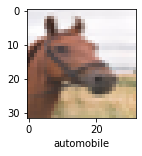

time: 275 ms (started: 2022-09-03 06:26:36 +00:00)


In [16]:
plot_sample(xtest,ytrain,99)

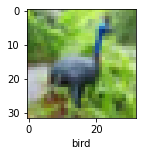

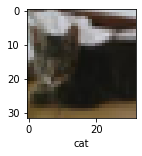

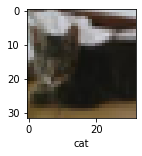

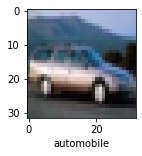

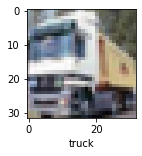

time: 1.03 s (started: 2022-09-03 06:26:36 +00:00)


In [17]:
x=xtrain
y=ytrain
for i in ytrain[:5]:
  plot_sample(x,y,i)

#Preprocesses

In [18]:
#normalization
xtrain_norm = xtrain / 255.0
xtest_norm = xtest / 255.0

time: 668 ms (started: 2022-09-03 06:26:37 +00:00)


time: 679 ms (started: 2022-09-03 06:26:37 +00:00)


# Model building

In [19]:
#to overcome overfitting problem, L2 normalizer and drop out layer is added 
cnn_model2 = models.Sequential([
                               #conv1
                               layers.Conv2D(filters=64,
                                             kernel_size=(3,3),
                                             padding='same',
                                             strides=(1,1),
                                             activation='relu',
                                             input_shape=(32,32,3),
                                             kernel_regularizer= tf.keras.regularizers.l2(0.001)                                        
                                             ),
                               layers.MaxPooling2D(pool_size=(2,2), strides=1),                            

                               #conv2
                               layers.Conv2D(filters=64,
                                             kernel_size=(3,3),
                                             padding='same',
                                             activation='relu',
                                             kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                               layers.MaxPooling2D((2,2), strides=1),
                               
                               #conv3
                               layers.Conv2D(filters=64,
                                             kernel_size=(3,3),
                                             padding='same',
                                             activation='relu',
                                             kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                               layers.MaxPooling2D((2,2), strides=1),
                               
                               
                               #conv4
                               layers.Conv2D(filters=64,
                                             kernel_size=(3,3),
                                             padding='same',
                                             activation='relu',
                                             kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                               layers.MaxPooling2D((2,2), strides=1),                               

                               #flatten layer and hidden layer
                               layers.Flatten(),
                               layers.Dense(500,activation='relu'),
                               tf.keras.layers.Dropout(0.2),

                               #o/p layer
                               layers.Dense(10, activation='softmax')
                               ])

cnn_model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(cnn_model2.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 64)       0

In [23]:
print(cnn_model2.fit(xtrain_norm,ytrain,epochs=10, batch_size=256))

Epoch 1/10
196/196 [==============================] - 13s 63ms/step - loss: 1.1078 - accuracy: 0.6269
Epoch 2/10
196/196 [==============================] - 12s 62ms/step - loss: 0.9608 - accuracy: 0.6820
Epoch 3/10
196/196 [==============================] - 12s 63ms/step - loss: 0.8505 - accuracy: 0.7221
Epoch 4/10
196/196 [==============================] - 12s 63ms/step - loss: 0.7556 - accuracy: 0.7555
Epoch 5/10
196/196 [==============================] - 12s 62ms/step - loss: 0.6511 - accuracy: 0.7925
Epoch 6/10
196/196 [==============================] - 12s 63ms/step - loss: 0.5651 - accuracy: 0.8244
Epoch 7/10
196/196 [==============================] - 12s 63ms/step - loss: 0.4861 - accuracy: 0.8514
Epoch 8/10
196/196 [==============================] - 12s 63ms/step - loss: 0.4054 - accuracy: 0.8794
Epoch 9/10
196/196 [==============================] - 12s 63ms/step - loss: 0.3509 - accuracy: 0.9016
Epoch 10/10
196/196 [==============================] - 13s 64ms/step - loss: 0.306

#Evaluation

In [24]:
print(cnn_model2.evaluate(xtest_norm,ytest))

313/313 [==============================] - 2s 6ms/step - loss: 1.1253 - accuracy: 0.7230
[1.1253432035446167, 0.7229999899864197]
time: 2.24 s (started: 2022-09-03 06:29:57 +00:00)


In [25]:
#model prediction on test data
yprds=cnn_model2.predict(xtest_norm)
yprds=[np.argmax(i) for i in yprds]

time: 1.49 s (started: 2022-09-03 06:29:59 +00:00)


In [26]:
print(f"predicted values:-> {yprds[:5]}\nActual values:-> {ytest[:5].reshape(-1,)}")

predicted values:-> [5, 8, 1, 0, 4]
Actual values:-> [3 8 8 0 6]
time: 1.08 ms (started: 2022-09-03 06:30:01 +00:00)


In [27]:
print(classification_report(ytest,yprds))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76      1000
           1       0.83      0.86      0.84      1000
           2       0.66      0.61      0.63      1000
           3       0.53      0.49      0.51      1000
           4       0.64      0.65      0.65      1000
           5       0.69      0.58      0.63      1000
           6       0.76      0.83      0.79      1000
           7       0.68      0.84      0.75      1000
           8       0.89      0.76      0.82      1000
           9       0.84      0.80      0.82      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000

time: 39 ms (started: 2022-09-03 06:30:01 +00:00)


#Model evaluation on user input images

In [28]:
path=r"/content/National-Horse-Day-1-300x300.jpg"

time: 694 µs (started: 2022-09-03 06:31:06 +00:00)


In [29]:
inmage = image.load_img(path) 

time: 21 ms (started: 2022-09-03 06:31:07 +00:00)


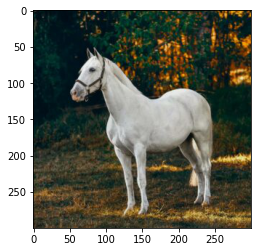

time: 174 ms (started: 2022-09-03 06:31:08 +00:00)


In [30]:
plt.imshow(inmage)

In [31]:
uimage= cv2.imread(path)
print(uimage)

[[[ 27  34  27]
  [ 17  24  17]
  [ 25  26  24]
  ...
  [ 42 103 165]
  [  5  46  68]
  [  0  16  15]]

 [[ 32  37  28]
  [ 45  50  41]
  [ 60  62  56]
  ...
  [ 30  88 147]
  [  4  47  68]
  [  0  18  21]]

 [[ 26  31  16]
  [ 38  40  28]
  [ 41  42  32]
  ...
  [  6  62 109]
  [  2  46  70]
  [  0  26  38]]

 ...

 [[ 22  38  51]
  [ 32  48  60]
  [ 38  53  62]
  ...
  [ 28  54  61]
  [ 27  53  60]
  [ 30  56  63]]

 [[ 34  48  60]
  [ 42  56  68]
  [ 40  52  62]
  ...
  [ 26  50  56]
  [ 29  53  59]
  [ 38  62  68]]

 [[ 38  52  64]
  [ 48  63  72]
  [ 42  54  64]
  ...
  [ 27  52  56]
  [ 34  58  64]
  [ 48  72  78]]]
time: 31.2 ms (started: 2022-09-03 06:31:08 +00:00)


In [32]:
print(uimage.shape)

(300, 300, 3)
time: 844 µs (started: 2022-09-03 06:31:09 +00:00)


In [33]:
IMAGE_CHANNEL = 3 

def prepare(filepath):
    IMG_SIZE = 32
    img_array = cv2.imread(filepath)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, IMAGE_CHANNEL)

time: 1.69 ms (started: 2022-09-03 06:31:09 +00:00)


In [34]:
userimg=prepare(path)/255
print(userimg.shape)

(1, 32, 32, 3)
time: 15.5 ms (started: 2022-09-03 06:31:09 +00:00)


In [35]:
# normalized and resized
print(userimg[0])

[[[0.09019608 0.0627451  0.01176471]
  [0.10588235 0.09803922 0.01568627]
  [0.07058824 0.05882353 0.        ]
  ...
  [0.         0.16862745 0.28235294]
  [0.11372549 0.51372549 0.72156863]
  [0.11372549 0.16078431 0.23921569]]

 [[0.18431373 0.17254902 0.14901961]
  [0.12156863 0.11372549 0.02352941]
  [0.08627451 0.08627451 0.00392157]
  ...
  [0.10980392 0.1372549  0.04313725]
  [0.0745098  0.09411765 0.        ]
  [0.15294118 0.08627451 0.00784314]]

 [[0.08627451 0.09803922 0.0627451 ]
  [0.13333333 0.13333333 0.01176471]
  [0.10196078 0.07843137 0.00392157]
  ...
  [0.02352941 0.09019608 0.1254902 ]
  [0.07843137 0.09411765 0.09411765]
  [0.12941176 0.11372549 0.00392157]]

 ...

 [[0.14509804 0.25882353 0.29019608]
  [0.19607843 0.30588235 0.34901961]
  [0.11372549 0.18823529 0.23137255]
  ...
  [0.08627451 0.23529412 0.30588235]
  [0.09803922 0.23137255 0.29019608]
  [0.0745098  0.22745098 0.29019608]]

 [[0.18431373 0.26666667 0.28235294]
  [0.15686275 0.23921569 0.26666667]


In [36]:
prediction = cnn_model2.predict([userimg])
ynew=[np.argmax(i) for i in prediction]
print(classes[ynew[0]])

horse
time: 197 ms (started: 2022-09-03 06:31:10 +00:00)
